In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Pre-Processing Data

In [59]:
df = pd.read_excel('ENB2012_data.xlsx')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [60]:
#Checking for missing values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

No null values

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459372e-17  3.636925e-1

<Axes: >

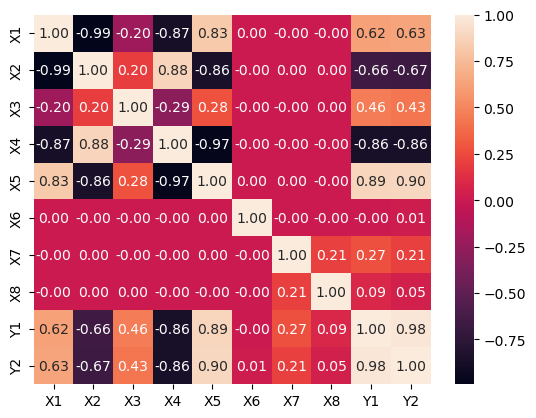

In [61]:
#Correlation between variables using correlation matrix 

correlation_matrix = df[df.columns].corr()
print(correlation_matrix)

#Using heatmap
sns.heatmap(df[df.columns].corr(), annot = True, fmt = ".2f")

In [62]:
#Handling Outliers
#(using InterQuartile Range method)
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df < lower_bound) | (df > upper_bound)]
print(outliers)


     X1  X2  X3  X4  X5  X6  X7  X8  Y1  Y2
0   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
1   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
763 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
764 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
765 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
766 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
767 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN

[768 rows x 10 columns]


No outliers observed

Splitting the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [63]:
X = df[['X1','X2','X3','X4','X5','X6','X7','X8']]
Y = df[['Y1','Y2']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

Equation for Y1 :
Y1 = b0 + b1*X1 + b2*X2 + b3*X3 + b4*X4 + b5*X5 + b6*X6 + b7*X7 + b8*X8
We can see from Heatmap that target Y1 majory depends on X1, X2, X3, X4, X5
so now, Y1 = b0 + b1*X1 + b2*X2 + b4*X4 + b5*X5 + b7*X7

In [64]:
X = df[['X1','X2','X7','X4','X5']]
Y = df[['Y1']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

X_train_with_one = np.c_[np.ones(X_train.shape[0]), X_train] 
X_test_with_one = np.c_[np.ones(X_test.shape[0]), X_test] 

In [65]:
#Multivariate Linear Regression
def multivar_lin_alg(X,Y):
    theta = np.linalg.inv(X.T @ X)@(X.T)@(Y)
    return theta


In [66]:
theta = multivar_lin_alg(X_train_with_one, Y_train)
Y_pred = X_test_with_one @ theta
Y_pred.shape

(154, 1)

<Figure size 640x480 with 0 Axes>

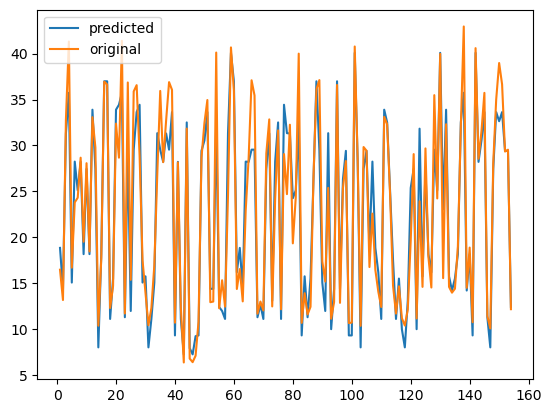

Mean Squared Error 9.217904316138153
R2 score 0.9115639331408548
Root Mean squared Error 3.036100182164309


In [67]:
arr = np.linspace(1,154,154)
plt.figure()
fig, axis = plt.subplots()
axis.plot(arr, Y_pred, label = 'predicted')
axis.plot(arr, Y_test, label = 'original')
legend = axis.legend()

plt.show()

mse = mean_squared_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error",mse)
print("R2 score",R2)
print("Root Mean squared Error",rmse)

With scikit_learn library

In [68]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred_linear = lr.predict(X_test)

mse_linear = mean_squared_error(Y_test, Y_pred_linear)
R2_linear = r2_score(Y_test, Y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print("Mean Squared Error",mse_linear)
print("R2 score",R2_linear)
print("Root Mean squared Error",rmse_linear)

Mean Squared Error 9.217904316155117
R2 score 0.9115639331406921
Root Mean squared Error 3.036100182167103


RIDGE REGRESSION

In [69]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
R2_ridge = r2_score(Y_test, Y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Mean Squared Error",mse_ridge)
print("R2 score",R2_ridge)
print("Root Mean squared Error",rmse_ridge)

Mean Squared Error 9.568597814649316
R2 score 0.9081993990105641
Root Mean squared Error 3.093315020273447


LASSO REGRESSION

In [70]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2)
lasso.fit(X_train, Y_train)
Y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
R2_lasso = r2_score(Y_test, Y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("Mean Squared Error",mse_lasso)
print("R2 score",R2_lasso)
print("Root Mean squared Error",rmse_lasso)

Mean Squared Error 11.644696315644097
R2 score 0.8882814242146329
Root Mean squared Error 3.4124326096853688


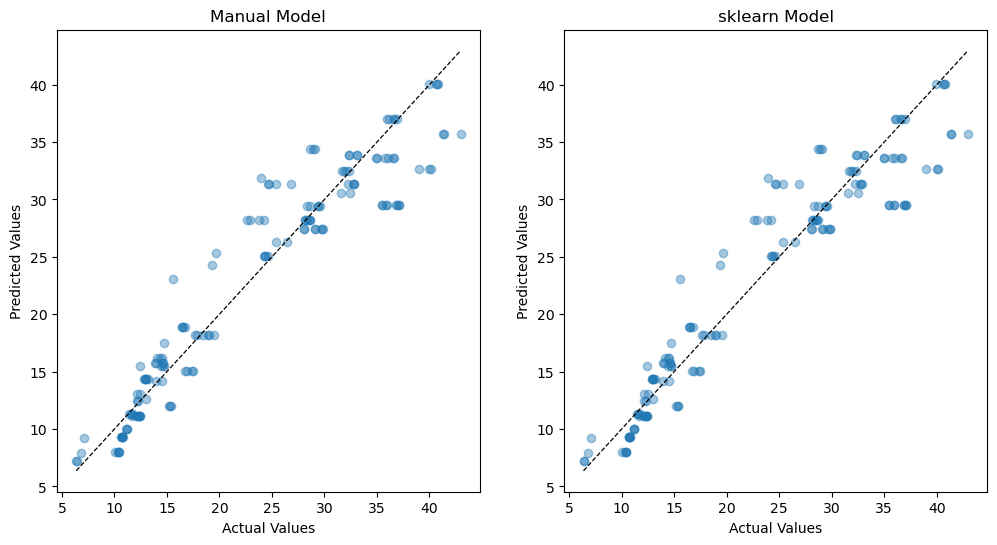

In [71]:
plt.figure(figsize=(12,6))

#Manual model
plt.subplot(1,2,1)
plt.scatter(Y_test, Y_pred, alpha = 0.4, marker = 'o')
plt.title('Manual Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw = '0.9')

#sklearn model
plt.subplot(1,2,2)
plt.scatter(Y_test, Y_pred_linear, alpha = 0.4, marker = 'o')
plt.title('sklearn Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw = '0.9')

Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

As to decrease the heatt load and increase the efficiency we can decrease the value of features that have a correlation of above 0.6 like X1;
We should increase the feature like X4 as they decrease the heat load value which increases the efficiency